C:\Users\Asus\AppData\Local\Temp\ipykernel_7664\2782485212.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


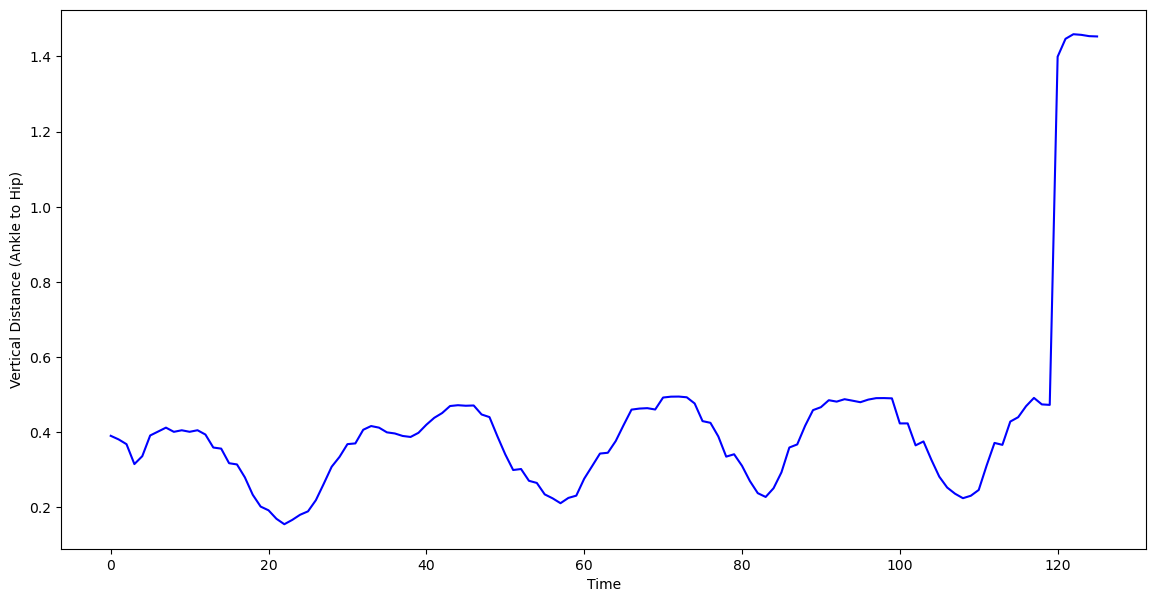

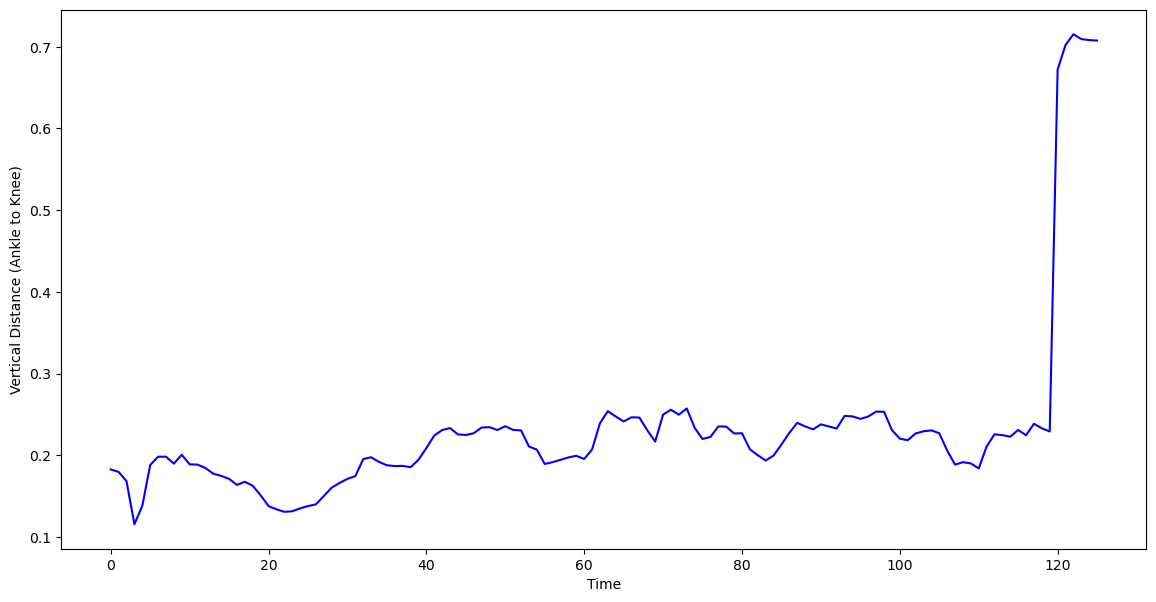

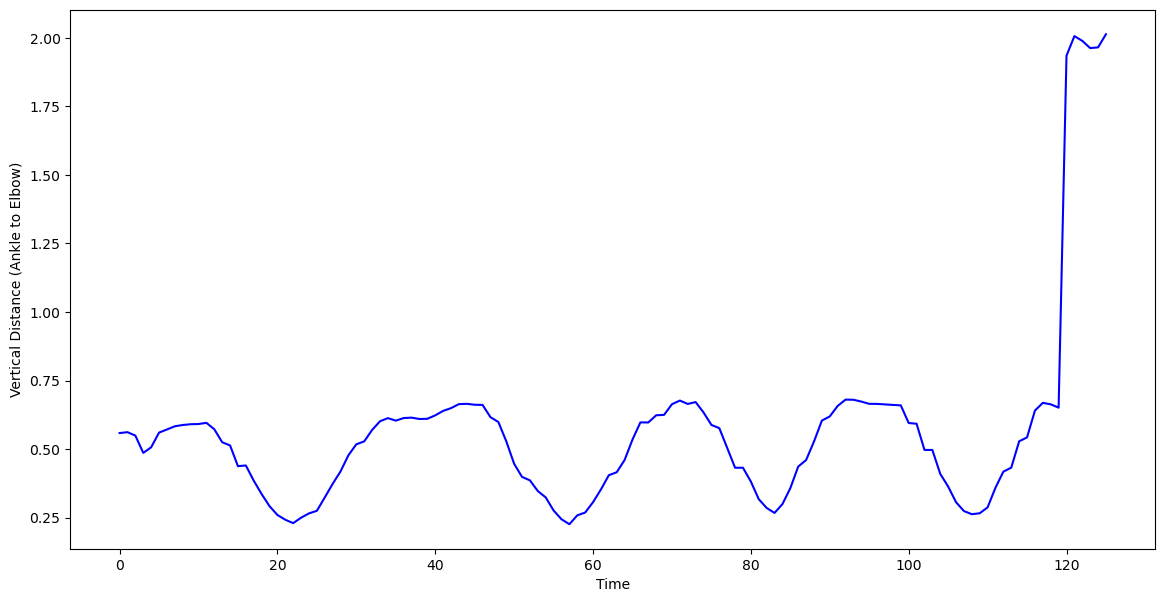

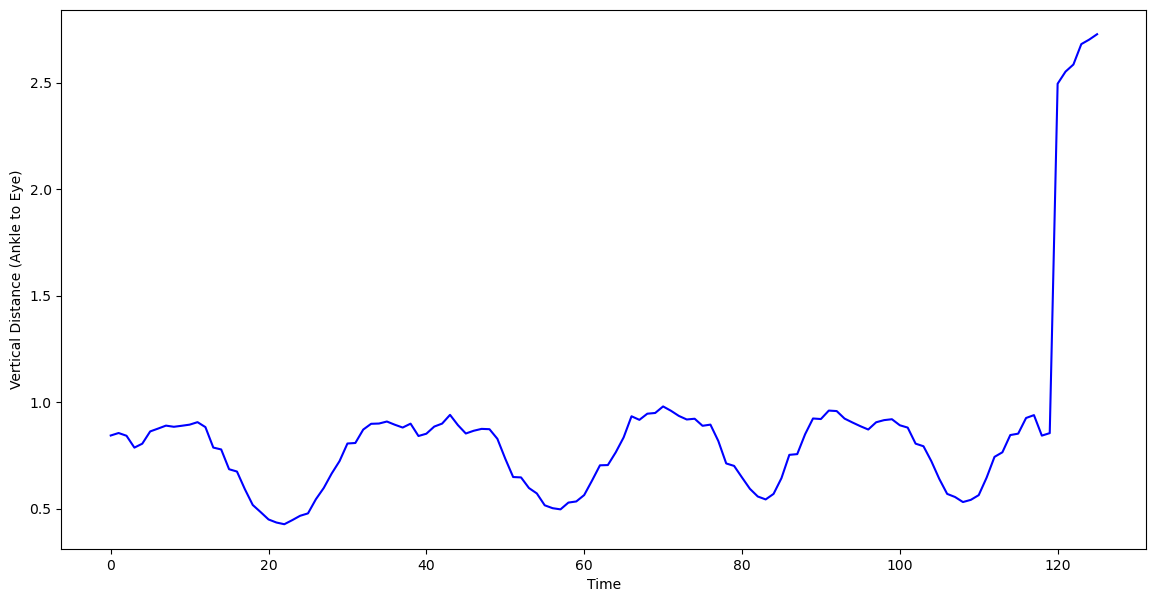

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'squat_landmark_distances.txt'
data = pd.read_csv(file_path, header=None)

# Assign column names
data.columns = ['left_ankle_to_left_knee', 'left_ankle_to_left_hip', 'left_ankle_to_left_elbow', 'left_ankle_to_left_eye']

# Convert columns to numeric, handling missing values
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values (NaN) with the previous values
data.fillna(method='ffill', inplace=True)


# Plot the time series data
plt.figure(figsize=(14, 7))
#plt.subplot(2,2,1)
plt.plot(data.index, data['left_ankle_to_left_hip'], label='Vertical Distance (Hip)', color='blue')
#plt.axhline(y=squat_threshold, color='r', linestyle='--', label='Squat Threshold')
#plt.legend()
#plt.title('Squat Analysis with Correct and Faulty Squats')
plt.xlabel('Time')
plt.ylabel('Vertical Distance (Ankle to Hip)')
plt.show()

# Plot the time series data
plt.figure(figsize=(14, 7))
#plt.subplot(2,2,2)
plt.plot(data.index, data['left_ankle_to_left_knee'], label='Vertical Distance (Knee)', color='blue')
#plt.axhline(y=squat_threshold, color='r', linestyle='--', label='Squat Threshold')
#plt.legend()
#plt.title('Squat Analysis with Correct and Faulty Squats')
plt.xlabel('Time')
plt.ylabel('Vertical Distance (Ankle to Knee)')
plt.show()

# Plot the time series data
plt.figure(figsize=(14, 7))
#plt.subplot(2,2,3)
plt.plot(data.index, data['left_ankle_to_left_elbow'], label='Vertical Distance (Hip to Elbow)', color='blue')
#plt.axhline(y=squat_threshold, color='r', linestyle='--', label='Squat Threshold')
#plt.legend()
#plt.title('Squat Analysis with Correct and Faulty Squats')
plt.xlabel('Time')
plt.ylabel('Vertical Distance (Ankle to Elbow)')
plt.show()


# Plot the time series data
plt.figure(figsize=(14, 7))
#plt.subplot(2,2,4)
plt.plot(data.index, data['left_ankle_to_left_eye'], label='Vertical Distance (Hip to Eye)', color='blue')
#plt.axhline(y=squat_threshold, color='r', linestyle='--', label='Squat Threshold')
#plt.legend()
#plt.title('Squat Analysis with Correct and Faulty Squats')
plt.xlabel('Time')
plt.ylabel('Vertical Distance (Ankle to Eye)')
plt.show()


In [9]:
import cv2
import numpy as np

# Function to select the region of interest (ROI)
def select_roi(event, x, y, flags, param):
    global roi_selected, roi_pts, frame, roi_box
    if event == cv2.EVENT_LBUTTONDOWN:
        roi_pts = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        roi_pts.append((x, y))
        roi_selected = True
        roi_box = (roi_pts[0][0], roi_pts[0][1], roi_pts[1][0] - roi_pts[0][0], roi_pts[1][1] - roi_pts[0][1])
        if roi_box[2] > 0 and roi_box[3] > 0:  # Ensure ROI has positive size
            cv2.rectangle(frame, roi_pts[0], roi_pts[1], (0, 255, 0), 2)
        cv2.imshow('Frame', frame)

# Initialize variables
roi_selected = False
roi_pts = []
roi_box = None
tracker = None
trace_points = []

# Video capture
cap = cv2.VideoCapture(0)

# Create a window and set mouse callback function
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', select_roi)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if roi_selected:
        if tracker is None:
            # Initialize the tracker with the selected ROI
            tracker = cv2.TrackerCSRT_create()
            tracker.init(frame, roi_box)
        else:
            # Update the tracker and get the updated position of the ROI
            success, roi_box = tracker.update(frame)
            if success:
                x, y, w, h = [int(v) for v in roi_box]
                center = (x + w // 2, y + h // 2)
                trace_points.append(center)
                # Draw the rectangle
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # Draw the trace line
                for i in range(1, len(trace_points)):
                    cv2.line(frame, trace_points[i - 1], trace_points[i], (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'Tracking failure detected', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Frame', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('r'):
        roi_selected = False
        roi_pts = []
        roi_box = None
        tracker = None
        trace_points = []

cap.release()
cv2.destroyAllWindows()